<a href="https://colab.research.google.com/github/manoj-0509/internship-tasks/blob/main/cirrhosis__eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cirrhosis.csv")
print(df)

      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      

In [ ]:
print(df.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


The dataset consists of following columns :
*  ID: unique identifier
*  N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
*   Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
* Drug: type of drug D-penicillamine or placebo
*   Age: age in [days]
*  Sex: M (male) or F (female)
* Ascites: presence of ascites N (No) or Y (Yes)
* Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
*   Spiders: presence of spiders N (No) or Y (Yes) 
*   Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
*   Bilirubin: serum bilirubin in [mg/dl]
*   Cholesterol: serum cholesterol in [mg/dl]
*   Albumin: albumin in [gm/dl]
*  Copper: urine copper in [ug/day]
*  Alk_Phos: alkaline phosphatase in [U/liter]
*   SGOT: SGOT in [U/ml]
*  Triglycerides: triglicerides in [mg/dl]
*   Platelets: platelets per cubic [ml/1000]
*  Prothrombin: prothrombin time in seconds [s]
*  Stage: histologic stage of disease (1, 2, 3, or 4)




In [ ]:
print(df.shape)

(418, 20)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

This data set has about 19 features. These features are related to the patient’s details like age, sex, etc. and patient’s blood tests like prothrombin, triglycerides, platelets levels, etc. All these factors help in understanding a patient’s chances of liver cirrhosis.

we have some NA values in our data, lets look at some statistical summary of numerical columns in out dataset.

In [ ]:
print(df.describe())

               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

We have some missing values in our data, lets see how many and in which columns.

In [ ]:
print(df.isna().sum())

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


**Handling Missing Values**


This is a problem, we could just get rid of all examples with NA values, but in this case our case of small dataset we cannot afford that.

We will impute the missing entries with some statistical calculations.



**We have two different types of data**


Numerical data ( Age, Cholesterol, Platelets.. etc)
Categorical Data ( Drug, Sex, Spiders..etc)
We will have to use different imputation for each type

For the numerical type we can use mean or median. In this case we will go with median to avoid skewing in the presence of outliers
For Categorical type we will impute the most frequent class.

In [ ]:
# For Numerical Type
print(df.select_dtypes(include=(['int64', 'float64'])).isna().sum())

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [ ]:
#Filling the null values with median
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

print(df.select_dtypes(include=(['int64', 'float64'])).isna().sum())

ID               0
N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [ ]:
# For Categorical type
print(df.select_dtypes(include=('object')).isna().sum())

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64


In [ ]:
#filling the string values with mode
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

print(df.select_dtypes(include=('object')).isna().sum())

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64


In [ ]:
# Converting Target categories into intigers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

Lets observe some Features with their relation with the disease

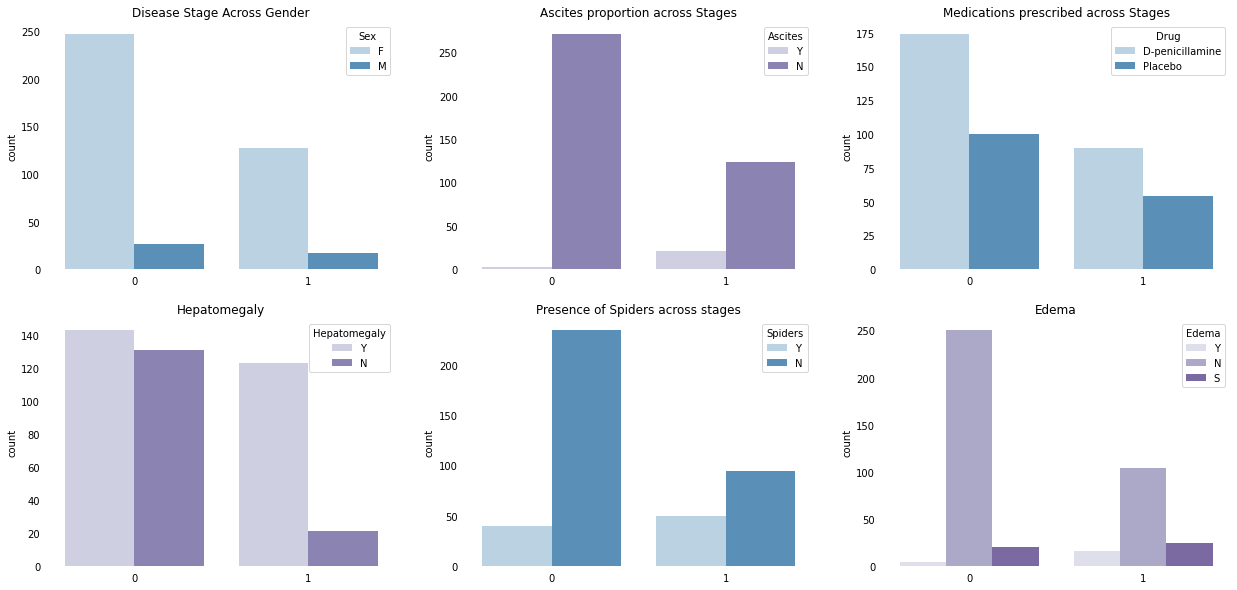

In [ ]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

There are some interesting insights if we observe closely. Take the case at Ascites, we observe that the rist of disease is higher with increase in Ascites. also presence of spiders has a positive relation with disease risk.

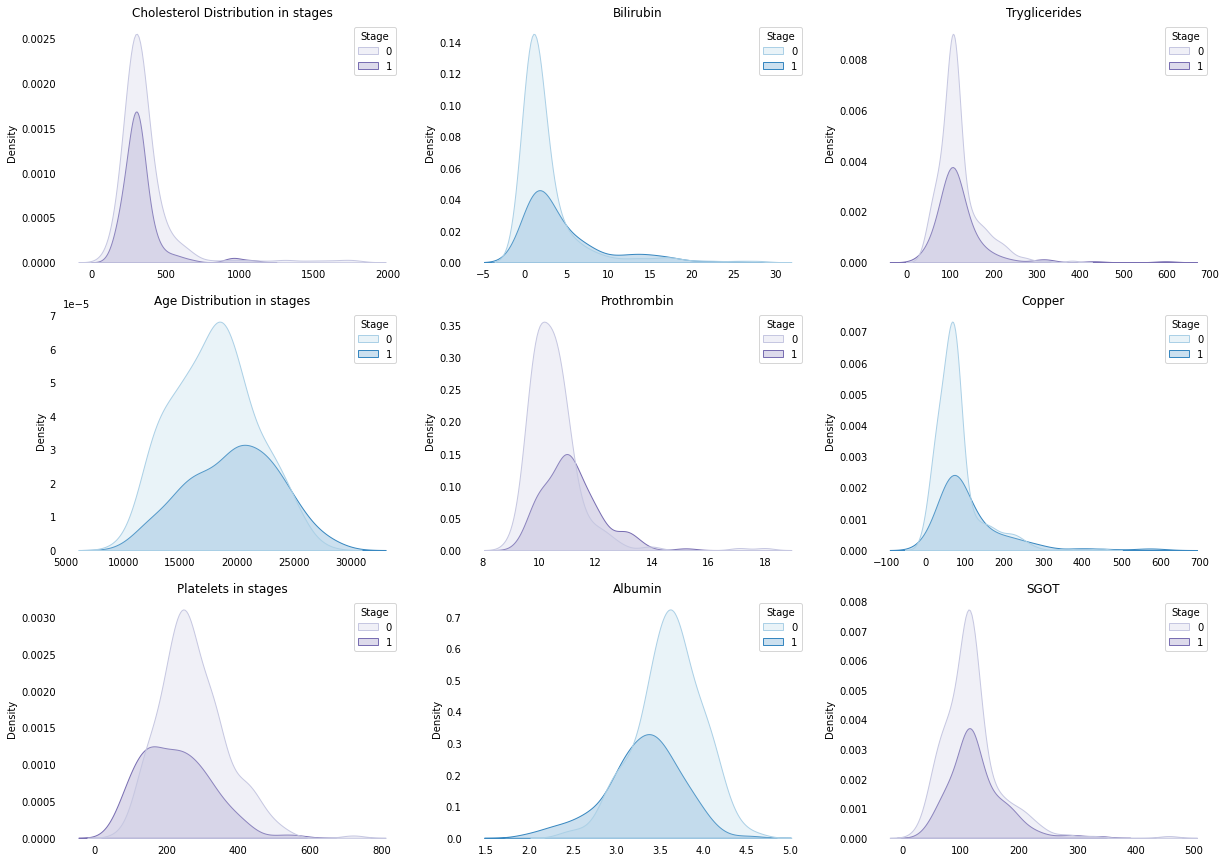

In [ ]:
#@title Distribution Polts
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

Looking at the feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability. Lets fit a regression line to check.

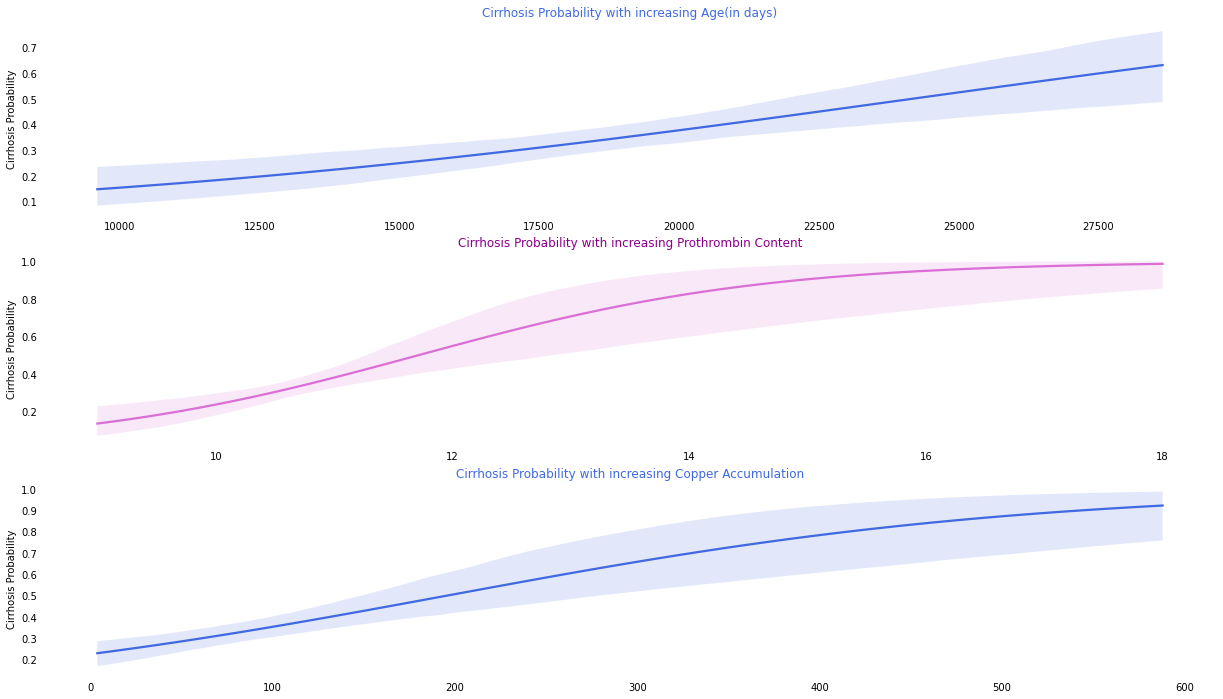

In [ ]:
#@title Regression Plots of Positive Correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in days)'), color='royalblue') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');

plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;

Looks like the data checks with our intuition. These parameters indeed increase
the risk of the disease

We can also observe some features such as Platelets, Albumin, Cholesterol where the probability of disease decrease with increase in feature value. Lets tally that with some more regression plots.

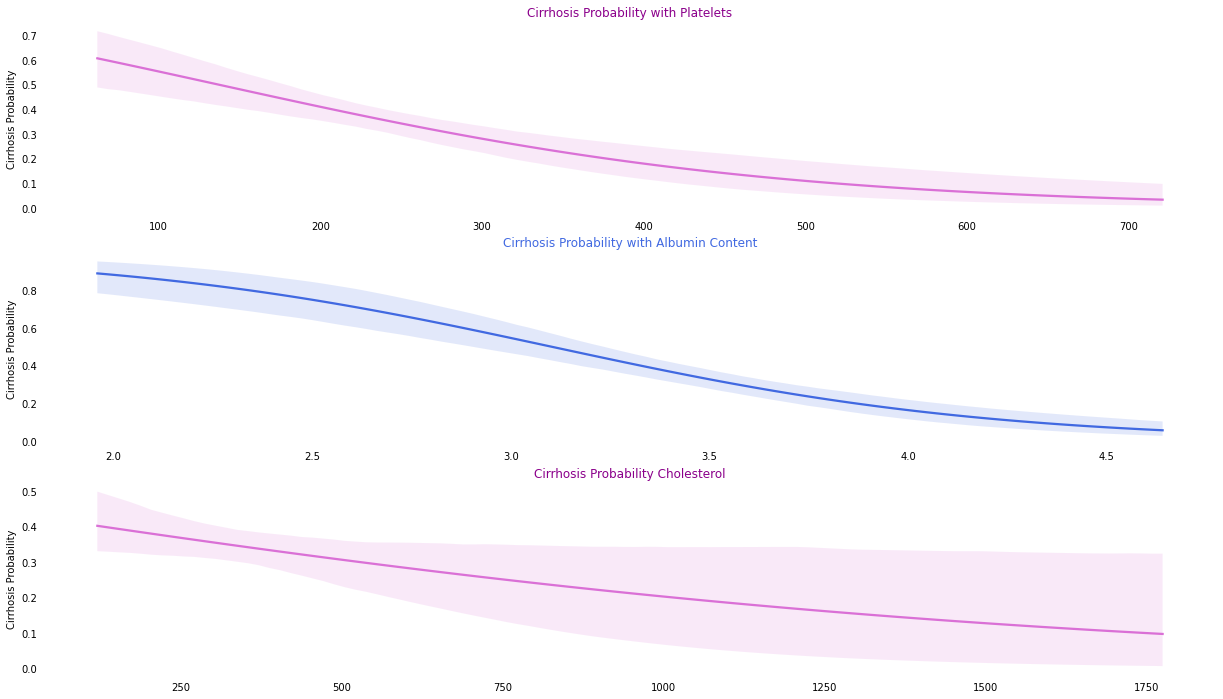

In [ ]:
#@title Regression Plots of negatively correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='darkmagenta') ;

Platelets, Albumin checks with our logic the findings about Cholesterol seems interesting! Looks like people with high Cholesterol have lower risk of Cirrhosis, this might not sound correct but our data certainly shows so.

This should help our model predict the target. We will be looking at what features contribute the most in later part of the project.

**Preprocessing data**

In [ ]:
# replacing catagorical data with intgers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

We will not be using 'Status' and 'N_days' as our features since this will cause data Leakage.

In [ ]:
"""# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df.pop('Stage')"""

"# Setting up Features and Target\nX = df.drop(['Status', 'N_Days', 'Stage'], axis=1)\ny = df.pop('Stage')"

In [ ]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,-1,0,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
1,2,4500,0,0,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
2,3,1012,-1,0,25594,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
3,4,1925,-1,0,19994,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
4,5,1504,1,1,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


In [ ]:
df['N_Days'].value_counts()

1434    2
3445    2
1216    2
1329    2
1067    2
       ..
2990    1
3098    1
3150    1
3149    1
976     1
Name: N_Days, Length: 399, dtype: int64

In [ ]:
df['Status'].value_counts()


 0    232
-1    161
 1     25
Name: Status, dtype: int64

In [ ]:
df['Drug'].value_counts()



0    264
1    154
Name: Drug, dtype: int64

In [ ]:
df['Age'].value_counts()



19724    7
18993    6
18628    6
23376    5
22646    5
        ..
15574    1
19295    1
18713    1
20256    1
12784    1
Name: Age, Length: 344, dtype: int64

In [ ]:
df['Sex'].value_counts()


1    374
0     44
Name: Sex, dtype: int64

In [ ]:
df['Ascites'].value_counts()


0    394
1     24
Name: Ascites, dtype: int64

In [ ]:
df['Hepatomegaly'].value_counts()

1    266
0    152
Name: Hepatomegaly, dtype: int64

In [ ]:
df['Spiders'].value_counts()


0    328
1     90
Name: Spiders, dtype: int64

In [ ]:

df['Edema'].value_counts()


 0    354
-1     44
 1     20
Name: Edema, dtype: int64

In [ ]:
df['Bilirubin'].value_counts()


0.7     33
0.6     31
0.5     23
0.8     23
1.1     20
        ..
24.5     1
10.8     1
3.7      1
5.9      1
4.6      1
Name: Bilirubin, Length: 98, dtype: int64

In [ ]:
df['Cholesterol'].value_counts()


309.5    134
260.0      4
316.0      4
448.0      4
257.0      3
        ... 
486.0      1
528.0      1
458.0      1
950.0      1
576.0      1
Name: Cholesterol, Length: 202, dtype: int64

In [ ]:
df[ 'Albumin'].value_counts()


3.35    11
3.50     8
3.60     8
3.40     7
3.65     7
        ..
3.38     1
2.43     1
3.05     1
1.96     1
3.17     1
Name: Albumin, Length: 154, dtype: int64

In [ ]:
df['Copper'].value_counts()


73.0     113
52.0       8
67.0       7
58.0       6
75.0       6
        ... 
178.0      1
110.0      1
154.0      1
269.0      1
186.0      1
Name: Copper, Length: 158, dtype: int64

In [ ]:
df['Alk_Phos'].value_counts()


1259.0    106
7277.0      2
1009.0      2
674.0       2
1636.0      2
         ... 
2404.0      1
754.0       1
979.0       1
1040.0      1
1056.0      1
Name: Alk_Phos, Length: 296, dtype: int64

In [ ]:
df['SGOT'].value_counts()


114.70    108
71.30       6
137.95      5
97.65       5
120.90      5
         ... 
104.49      1
67.08       1
136.74      1
173.60      1
136.00      1
Name: SGOT, Length: 179, dtype: int64

In [ ]:
df['Tryglicerides'].value_counts()


108.0    141
118.0      7
91.0       6
90.0       6
68.0       5
        ... 
272.0      1
318.0      1
243.0      1
598.0      1
82.0       1
Name: Tryglicerides, Length: 146, dtype: int64

In [ ]:
df['Platelets'].value_counts()


251.0    14
344.0     6
165.0     5
269.0     5
213.0     5
         ..
140.0     1
301.0     1
339.0     1
108.0     1
350.0     1
Name: Platelets, Length: 243, dtype: int64

In [ ]:
df['Prothrombin'].value_counts()


10.6    41
11.0    32
10.0    25
9.9     24
9.8     22
10.1    22
10.3    17
10.8    16
10.9    15
10.2    15
10.4    15
9.6     14
11.2    13
10.5    13
11.5    12
11.1    12
10.7    11
9.7     11
9.5      9
12.0     8
11.6     6
11.7     6
11.4     6
12.1     5
11.3     4
13.0     4
12.4     4
11.8     4
12.3     3
12.2     3
13.2     3
11.9     2
9.4      2
12.7     2
13.6     2
12.9     2
9.0      2
9.1      1
13.1     1
13.8     1
18.0     1
9.2      1
15.2     1
13.3     1
14.1     1
12.6     1
17.1     1
9.3      1
Name: Prothrombin, dtype: int64

In [ ]:
df['Stage'].value_counts()

0    274
1    144
Name: Stage, dtype: int64

Skewness is : 0.4726020506759292


Text(0.5, 1.0, 'Analysis of.N_Days')

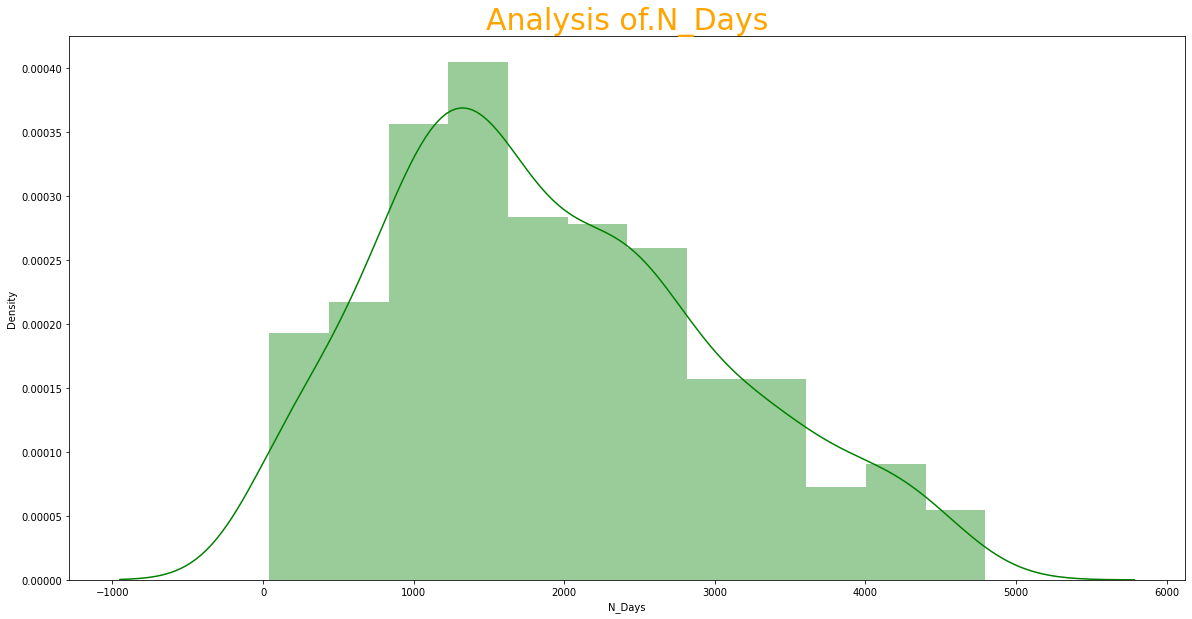

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.N_Days,color='green')
print("Skewness is :",df.N_Days.skew())
plt.title(f"Analysis of.N_Days" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of.N_Days - Box Plot')

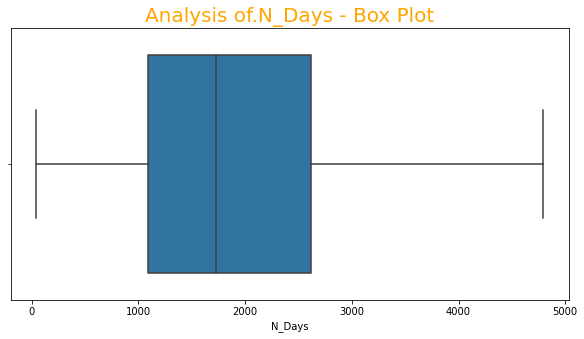

In [ ]:
#boxplot for.N_Days
plt.figure(figsize=(10,5))
sns.boxplot(df.N_Days)
plt.title(f"Analysis of.N_Days - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.2037280881411964


Text(0.5, 1.0, 'Analysis of Status')

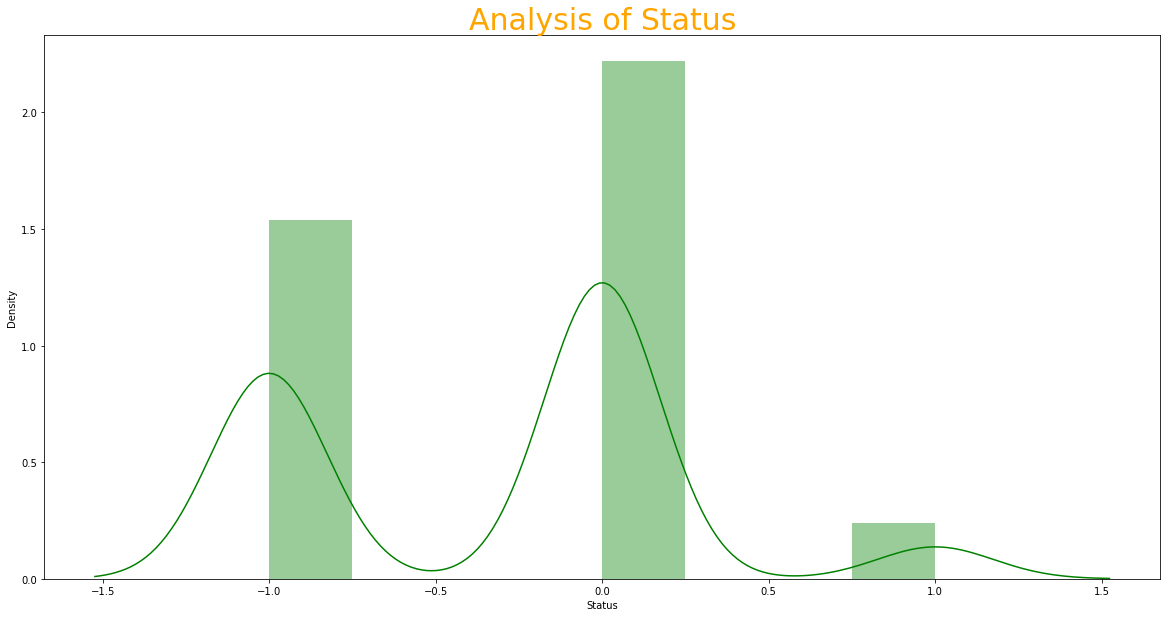

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Status,color='green')
print("Skewness is :",df.Status.skew())
plt.title(f"Analysis of Status" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Status - Box Plot')

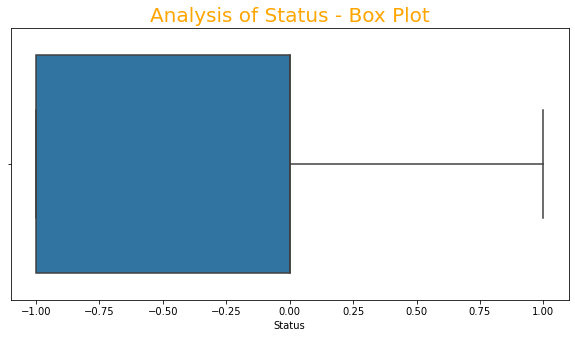

In [ ]:
#boxplot for Status
plt.figure(figsize=(10,5))
sns.boxplot(df.Status)
plt.title(f"Analysis of Status - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.547511441338977


Text(0.5, 1.0, 'Analysis of Drug ')

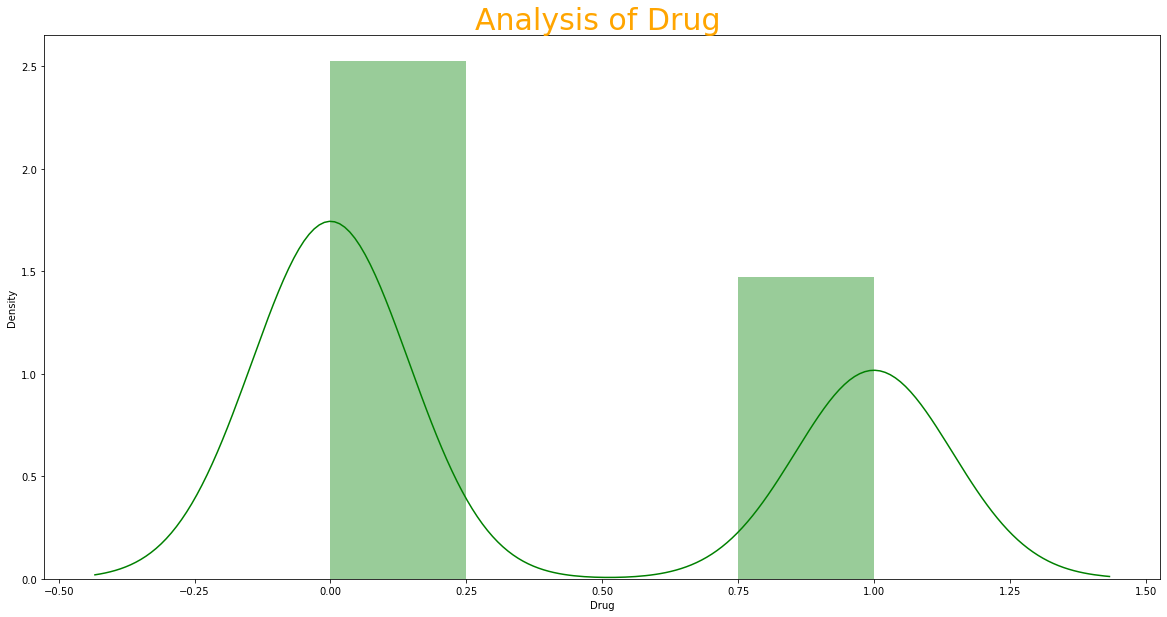

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Drug,color='green')
print("Skewness is :",df.Drug.skew())
plt.title(f"Analysis of Drug ",fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Drug - Box Plot')

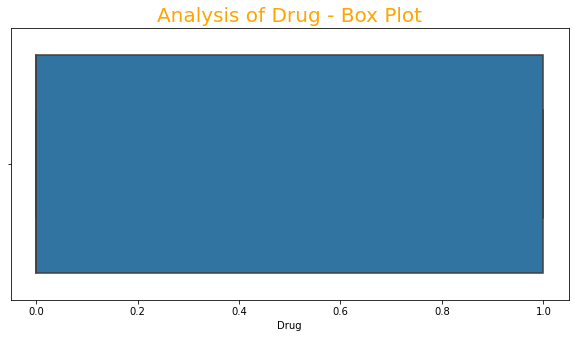

In [ ]:
#boxplot for 'Drug'
plt.figure(figsize=(10,5))
sns.boxplot(df.Drug)
plt.title(f"Analysis of Drug - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.08685015608405514


Text(0.5, 1.0, 'Analysis of Age')

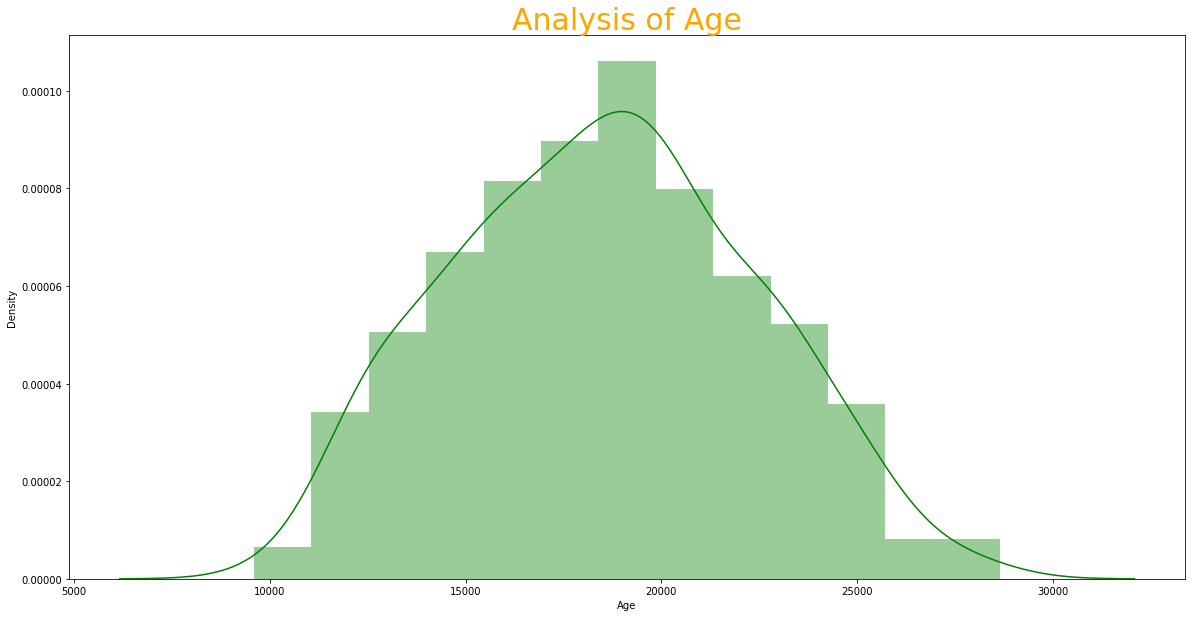

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Age,color='green')
print("Skewness is :",df.Age.skew())
plt.title(f"Analysis of Age" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Age - Box Plot')

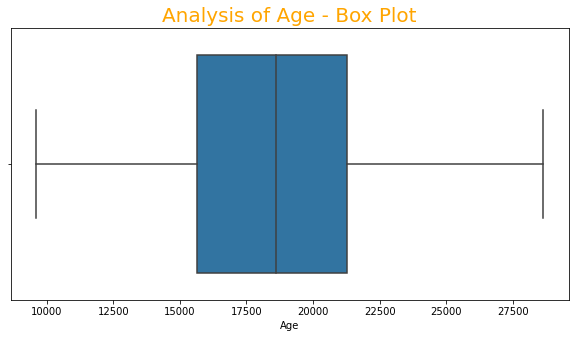

In [ ]:
#boxplot for Age
plt.figure(figsize=(10,5))
sns.boxplot(df.Age)
plt.title(f"Analysis of Age - Box Plot" , fontsize=20,color="orange")

Skewness is : -2.5817526905083157


Text(0.5, 1.0, 'Analysis of Sex')

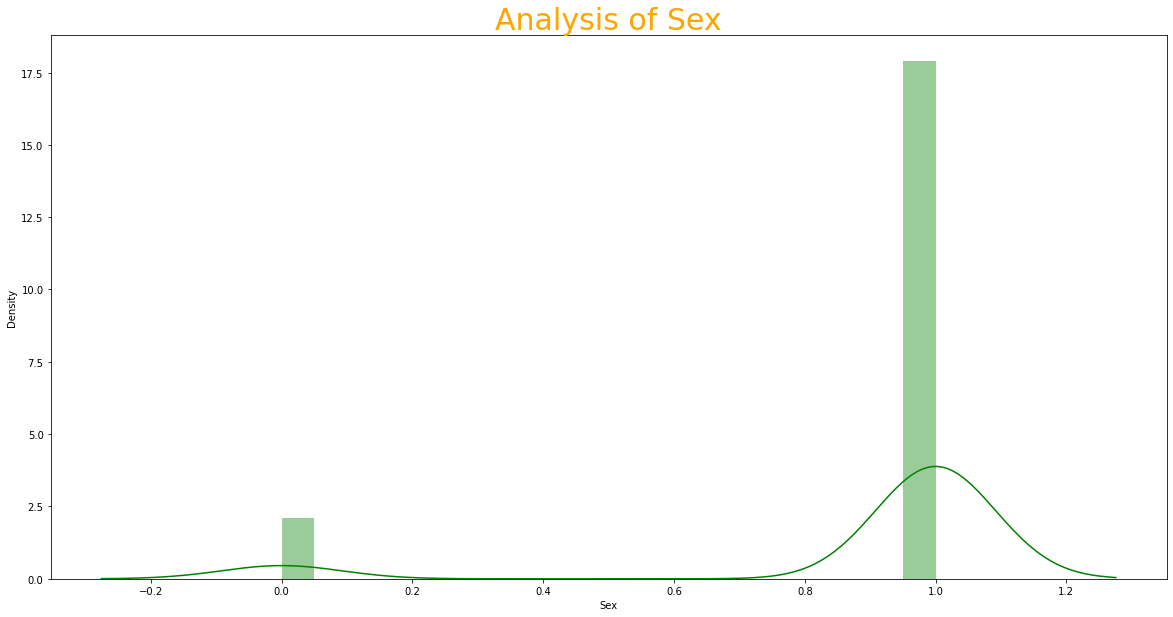

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Sex,color='green')
print("Skewness is :",df.Sex.skew())
plt.title(f"Analysis of Sex" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Sex - Box Plot')

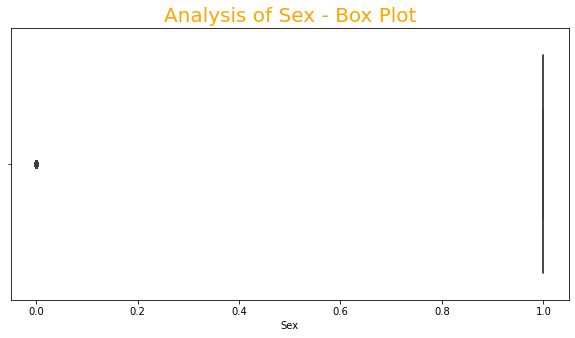

In [ ]:
#boxplot for Sex
plt.figure(figsize=(10,5))
sns.boxplot(df.Sex)
plt.title(f"Analysis of Sex - Box Plot" , fontsize=20,color="orange")

Skewness is : 3.818658575553194


Text(0.5, 1.0, 'Analysis of Ascites')

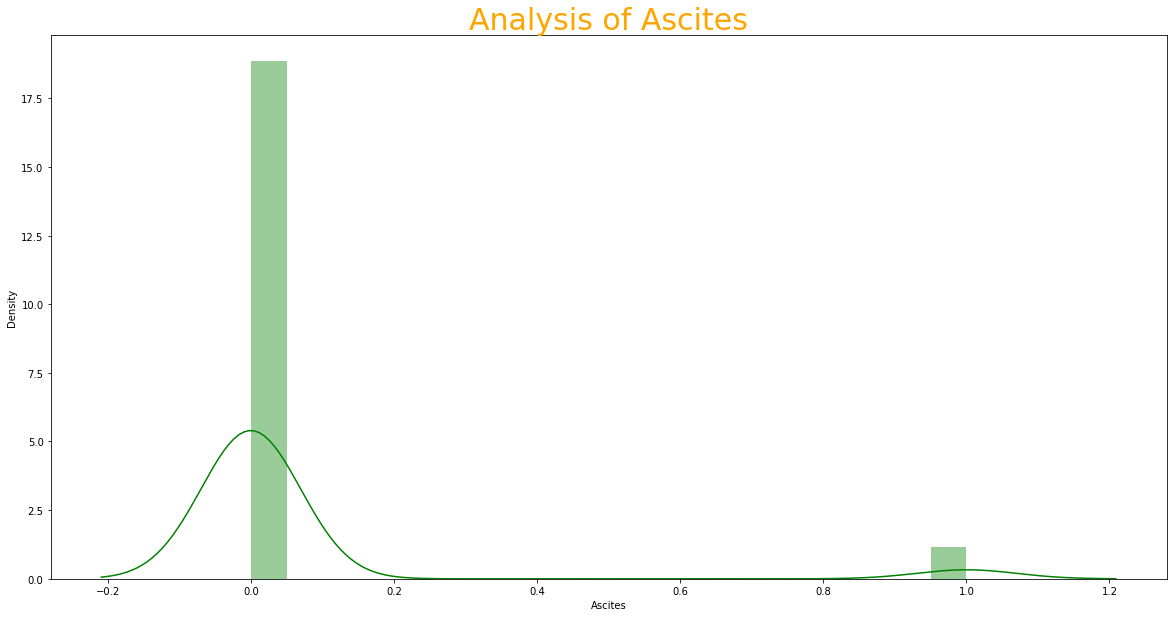

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Ascites,color='green')
print("Skewness is :",df.Ascites.skew())
plt.title(f"Analysis of Ascites" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Ascites - Box Plot')

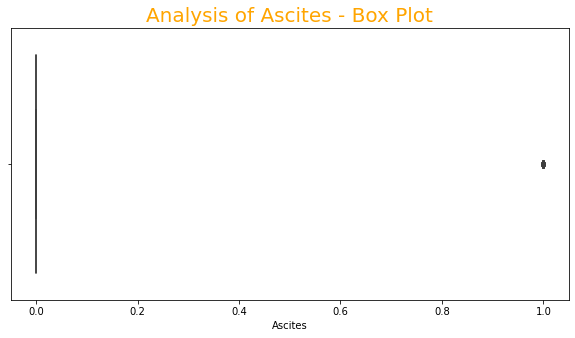

In [ ]:
#boxplot for Ascites
plt.figure(figsize=(10,5))
sns.boxplot(df.Ascites)
plt.title(f"Analysis of Ascites - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.5689905804746246


Text(0.5, 1.0, 'Analysis of Hepatomegaly')

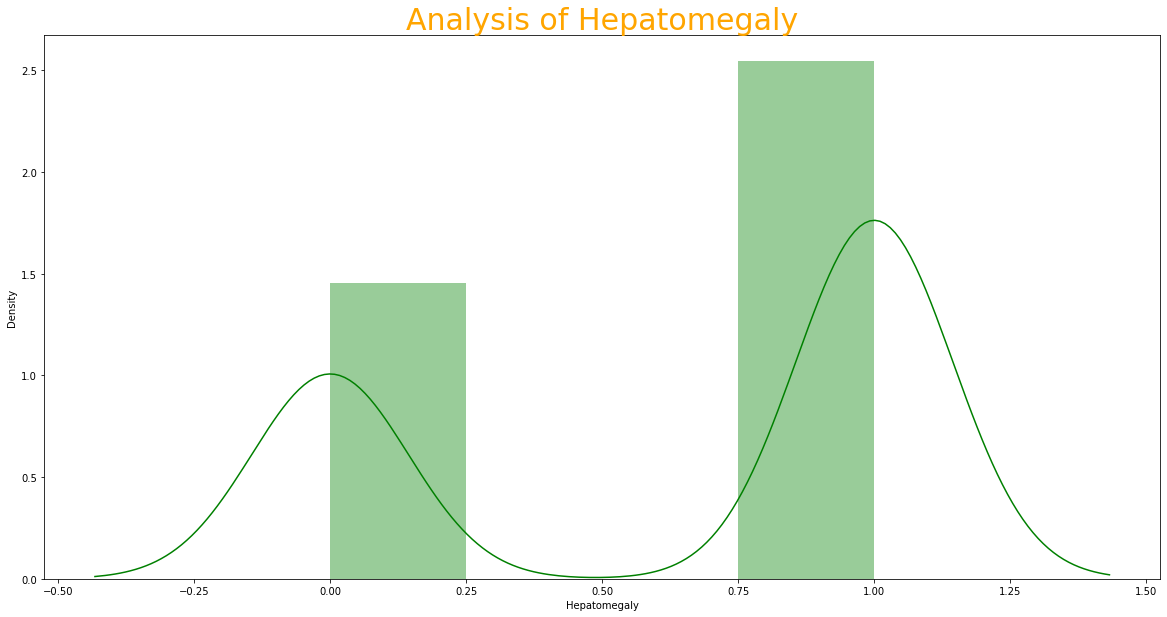

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Hepatomegaly,color='green')
print("Skewness is :",df.Hepatomegaly.skew())
plt.title(f"Analysis of Hepatomegaly" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Hepatomegaly - Box Plot')

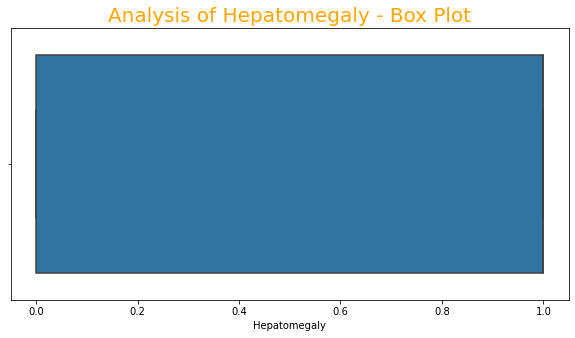

In [ ]:
#boxplot for Hepatomegaly
plt.figure(figsize=(10,5))
sns.boxplot(df.Hepatomegaly)
plt.title(f"Analysis of Hepatomegaly - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.3902138736125793


Text(0.5, 1.0, 'Analysis of Spiders')

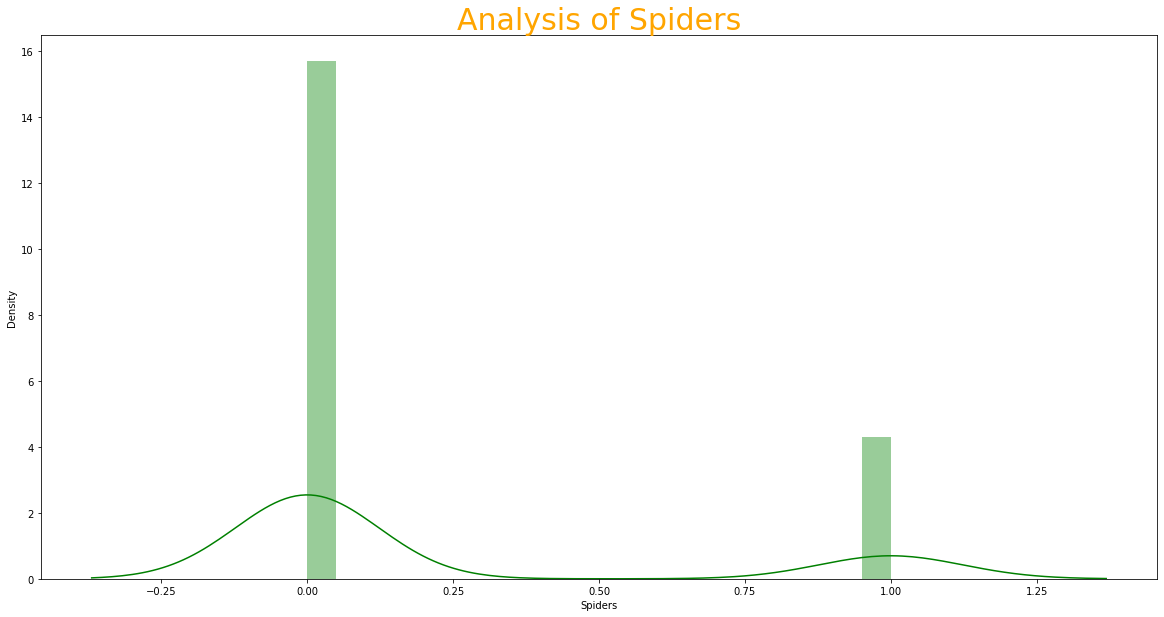

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Spiders,color='green')
print("Skewness is :",df.Spiders.skew())
plt.title(f"Analysis of Spiders" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Spiders - Box Plot')

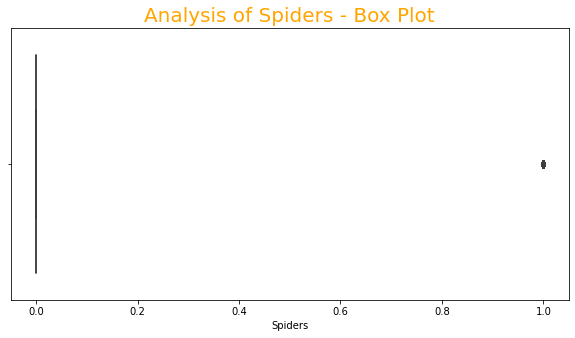

In [ ]:
#boxplot for Spiders
plt.figure(figsize=(10,5))
sns.boxplot(df.Spiders)
plt.title(f"Analysis of Spiders - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.5438359284804954


Text(0.5, 1.0, 'Analysis of Edema')

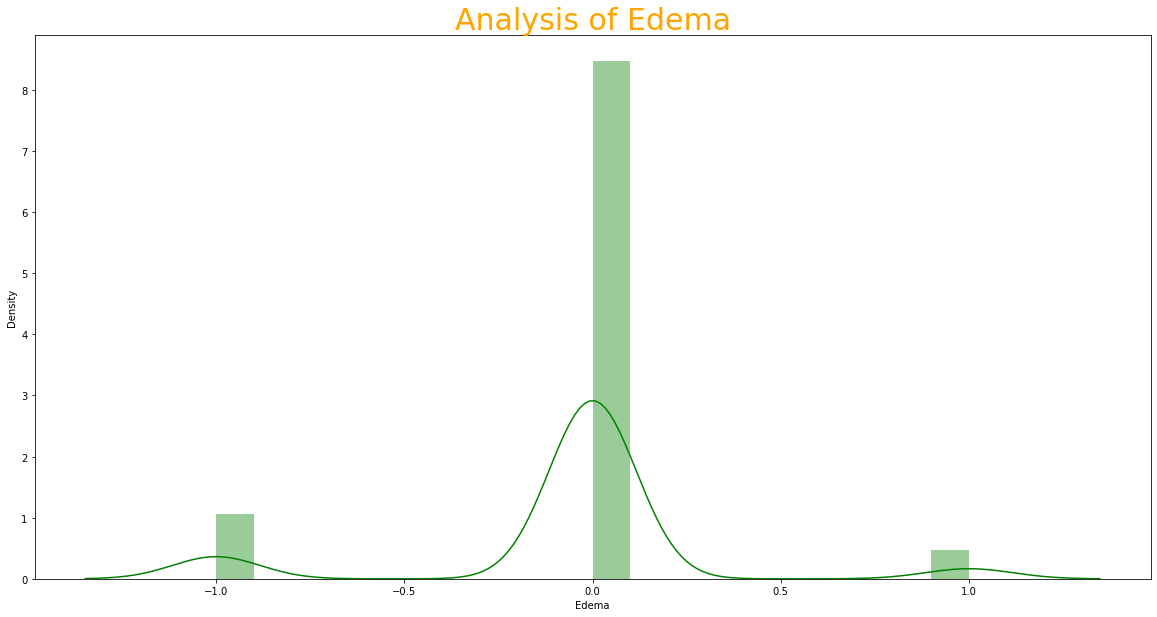

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Edema,color='green')
print("Skewness is :",df.Edema.skew())
plt.title(f"Analysis of Edema" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Edema - Box Plot')

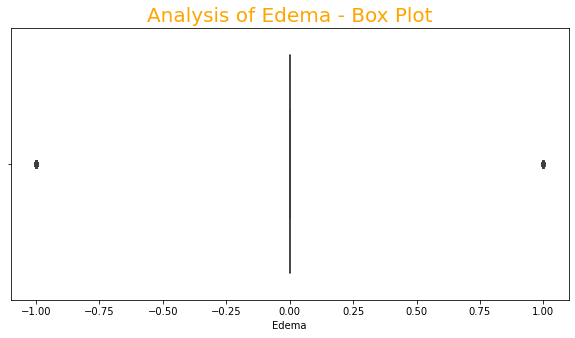

In [ ]:
#boxplot for Edema
plt.figure(figsize=(10,5))
sns.boxplot(df.Edema)
plt.title(f"Analysis of Edema - Box Plot" , fontsize=20,color="orange")

Skewness is : 2.717610708740455


Text(0.5, 1.0, 'Analysis of Bilirubin')

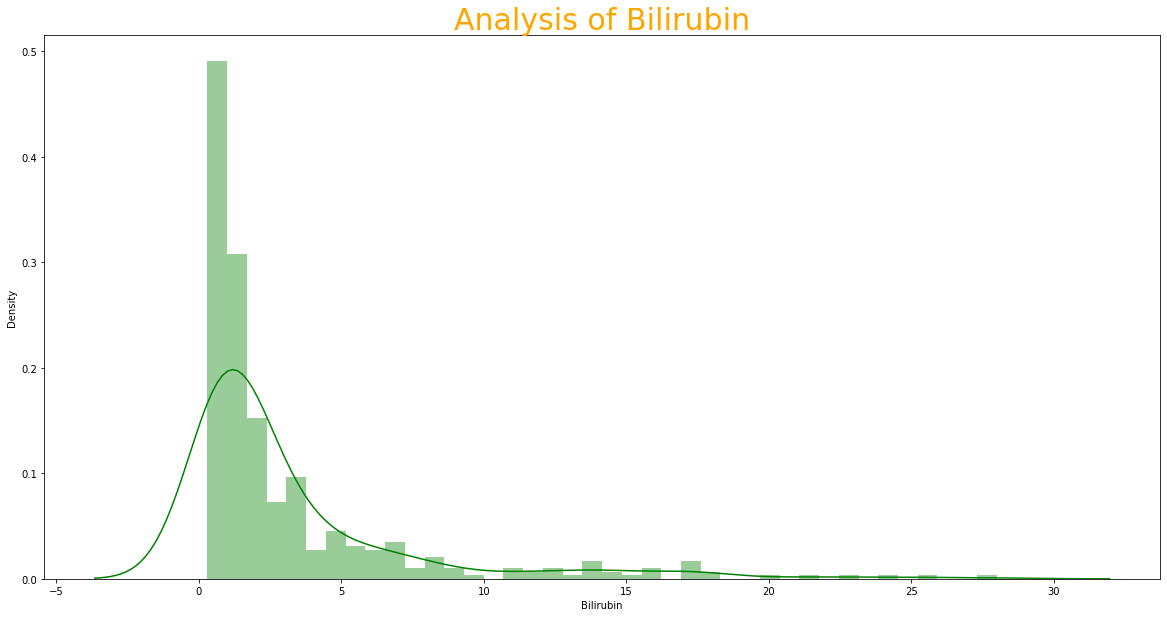

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Bilirubin,color='green')
print("Skewness is :",df.Bilirubin.skew())
plt.title(f"Analysis of Bilirubin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Bilirubin - Box Plot')

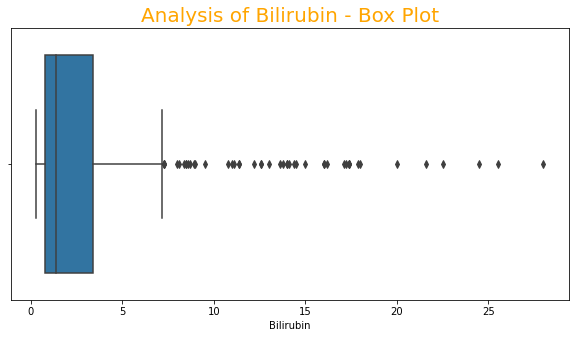

In [ ]:
#boxplot for Bilirubin
plt.figure(figsize=(10,5))
sns.boxplot(df.Bilirubin)
plt.title(f"Analysis of Bilirubin - Box Plot" , fontsize=20,color="orange")

Skewness is : 4.289884410058411


Text(0.5, 1.0, 'Analysis of Cholesterol')

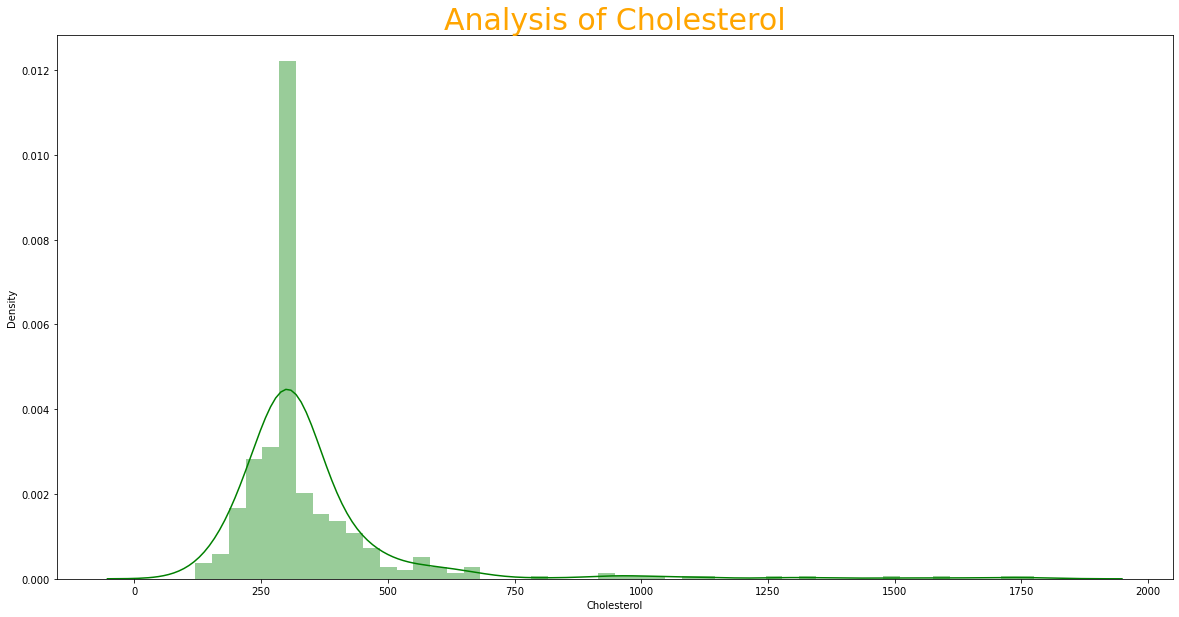

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Cholesterol,color='green')
print("Skewness is :",df.Cholesterol.skew())
plt.title(f"Analysis of Cholesterol" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Cholesterol - Box Plot')

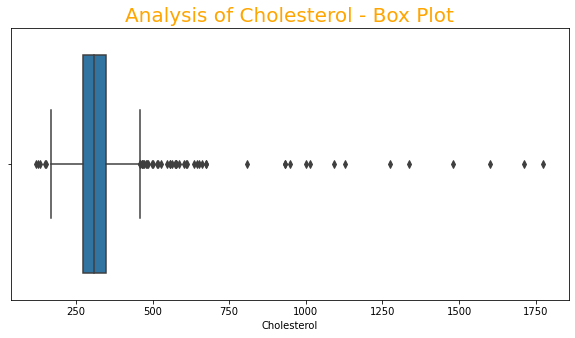

In [ ]:
#boxplot for Cholesterol
plt.figure(figsize=(10,5))
sns.boxplot(df.Cholesterol)
plt.title(f"Analysis of Cholesterol - Box Plot" , fontsize=20,color="orange")

Skewness is : -0.4675265141762801


Text(0.5, 1.0, 'Analysis of Albumin')

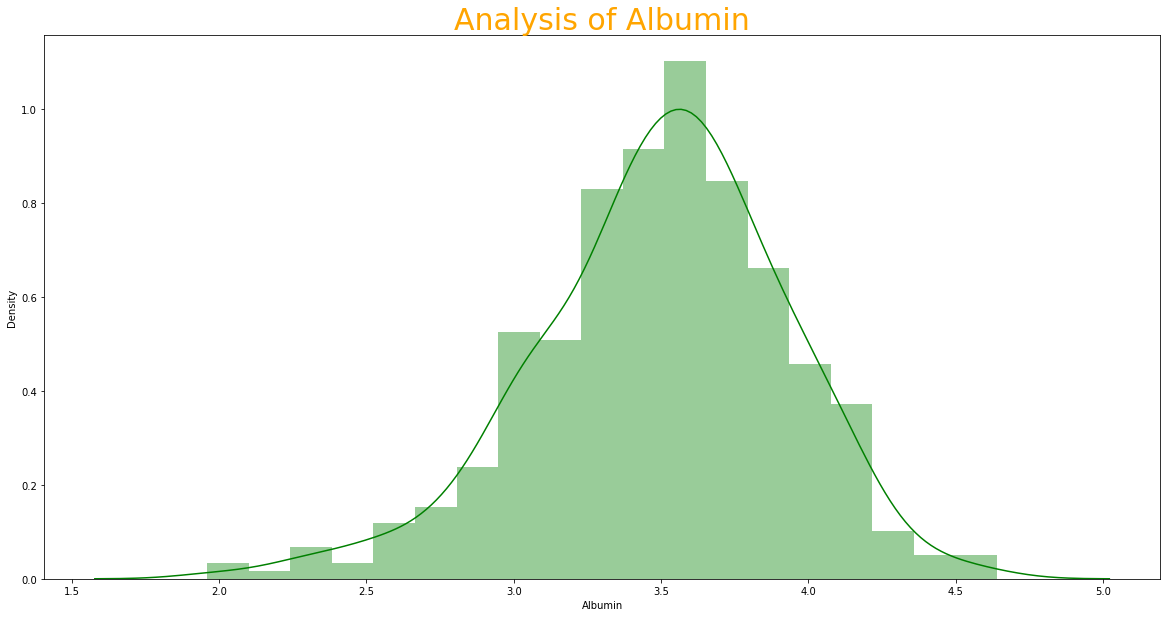

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Albumin,color='green')
print("Skewness is :",df.Albumin.skew())
plt.title(f"Analysis of Albumin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Albumin - Box Plot')

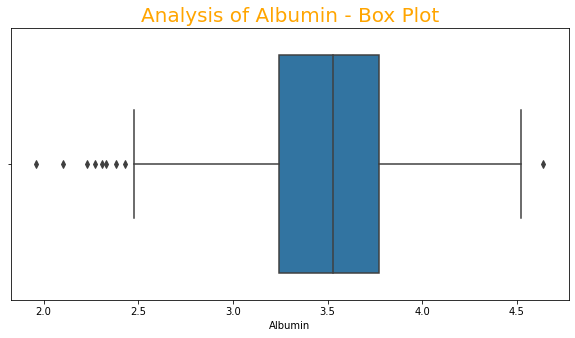

In [ ]:
#boxplot for Albumin
plt.figure(figsize=(10,5))
sns.boxplot(df.Albumin)
plt.title(f"Analysis of Albumin - Box Plot" , fontsize=20,color="orange")

Skewness is : 2.8367109495700715


Text(0.5, 1.0, 'Analysis of Copper')

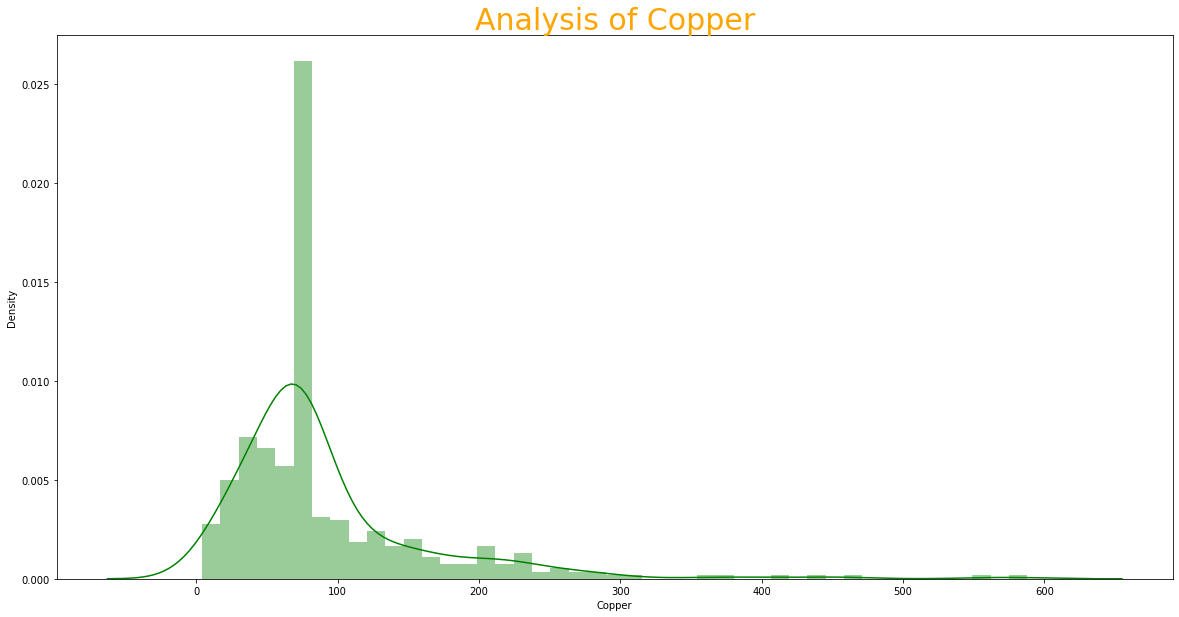

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Copper,color='green')
print("Skewness is :",df.Copper.skew())
plt.title(f"Analysis of Copper" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Copper - Box Plot')

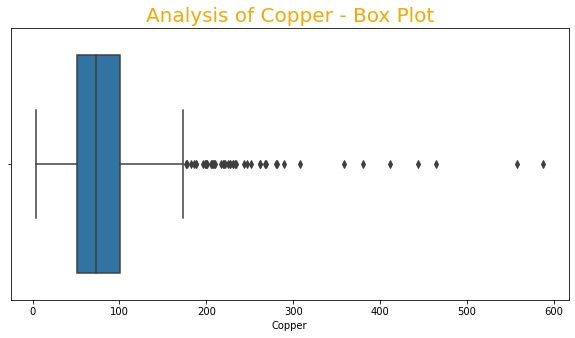

In [ ]:
#boxplot for Copper
plt.figure(figsize=(10,5))
sns.boxplot(df.Copper)
plt.title(f"Analysis of Copper - Box Plot" , fontsize=20,color="orange")

Skewness is : 3.595532137094743


Text(0.5, 1.0, 'Analysis of Alk_Phos')

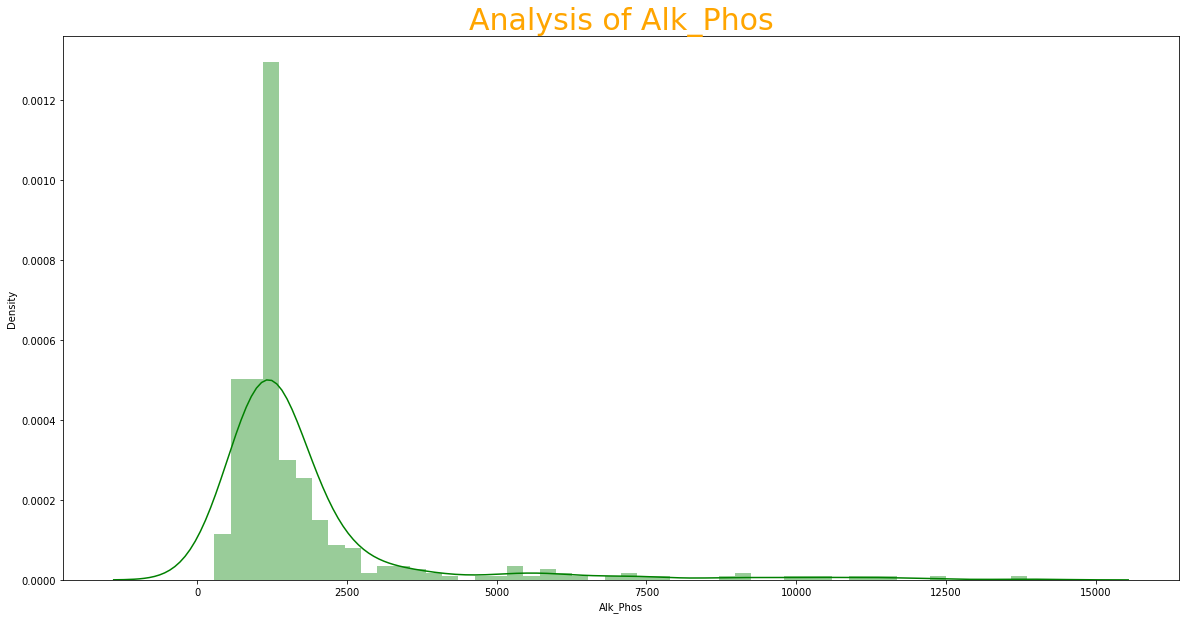

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Alk_Phos,color='green')
print("Skewness is :",df.Alk_Phos.skew())
plt.title(f"Analysis of Alk_Phos" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Alk_Phos - Box Plot')

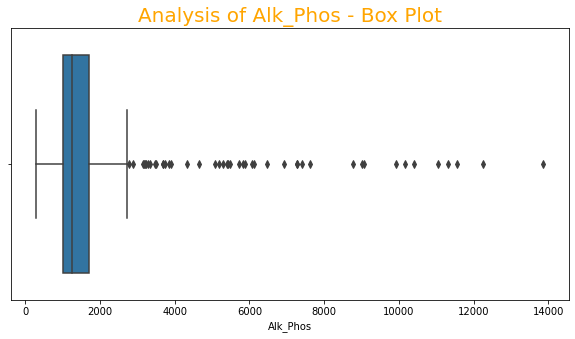

In [ ]:
#boxplot for Alk_Phos
plt.figure(figsize=(10,5))
sns.boxplot(df.Alk_Phos)
plt.title(f"Analysis of Alk_Phos - Box Plot" , fontsize=20,color="orange")

Skewness is : 1.7845193202736311


Text(0.5, 1.0, 'Analysis of SGOT')

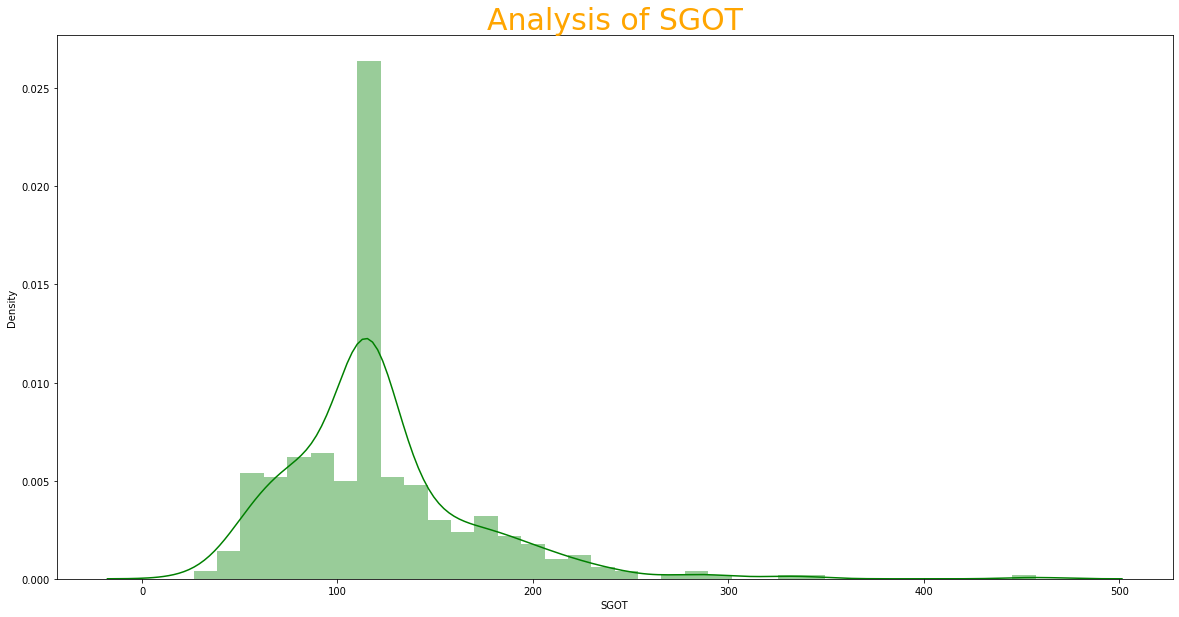

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.SGOT,color='green')
print("Skewness is :",df.SGOT.skew())
plt.title(f"Analysis of SGOT" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of SGOT - Box Plot')

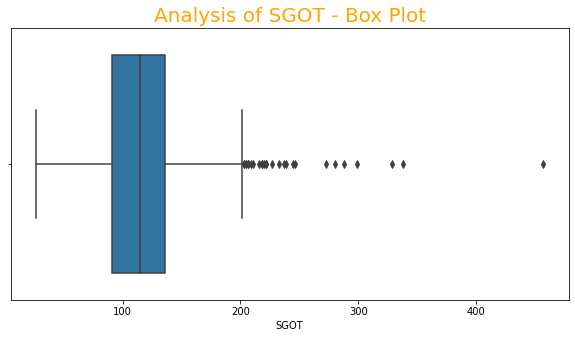

In [ ]:
#boxplot for SGOT
plt.figure(figsize=(10,5))
sns.boxplot(df.SGOT)
plt.title(f"Analysis of SGOT - Box Plot" , fontsize=20,color="orange")

Skewness is : 3.2657236876902602


Text(0.5, 1.0, 'Analysis of Tryglicerides')

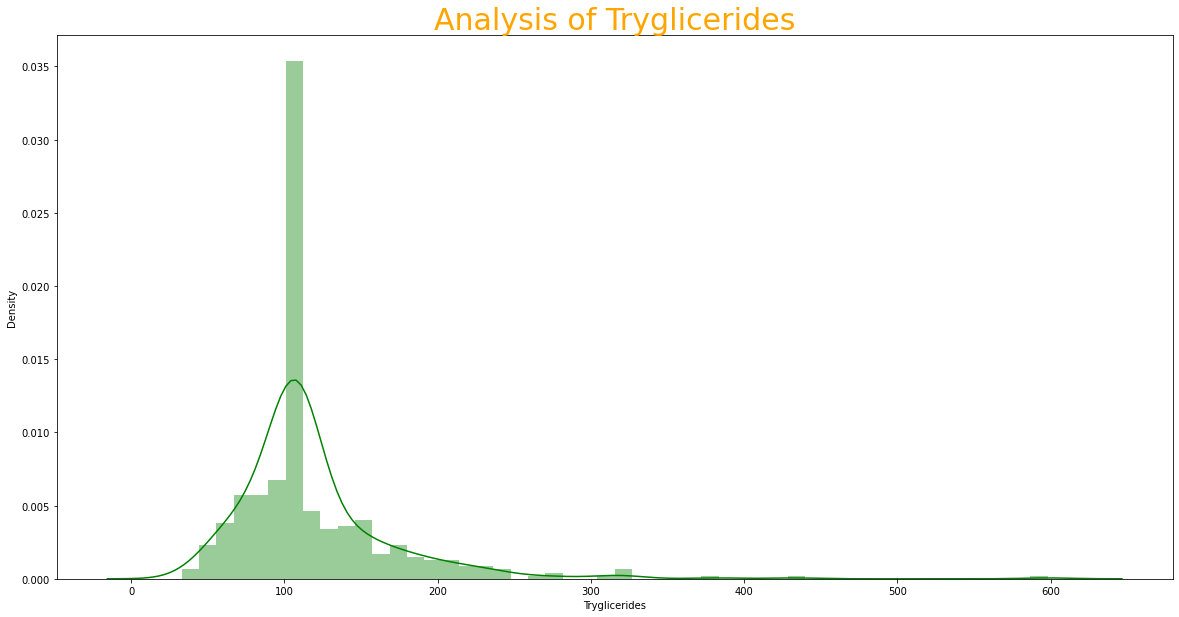

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Tryglicerides,color='green')
print("Skewness is :",df.Tryglicerides.skew())
plt.title(f"Analysis of Tryglicerides" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Tryglicerides - Box Plot')

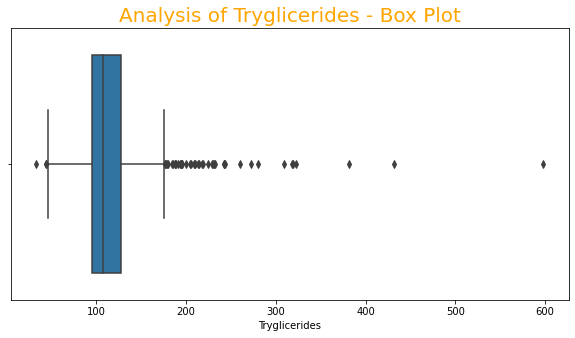

In [ ]:
#boxplot for Tryglicerides
plt.figure(figsize=(10,5))
sns.boxplot(df.Tryglicerides)
plt.title(f"Analysis of Tryglicerides - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.64027849241312


Text(0.5, 1.0, 'Analysis of Platelets')

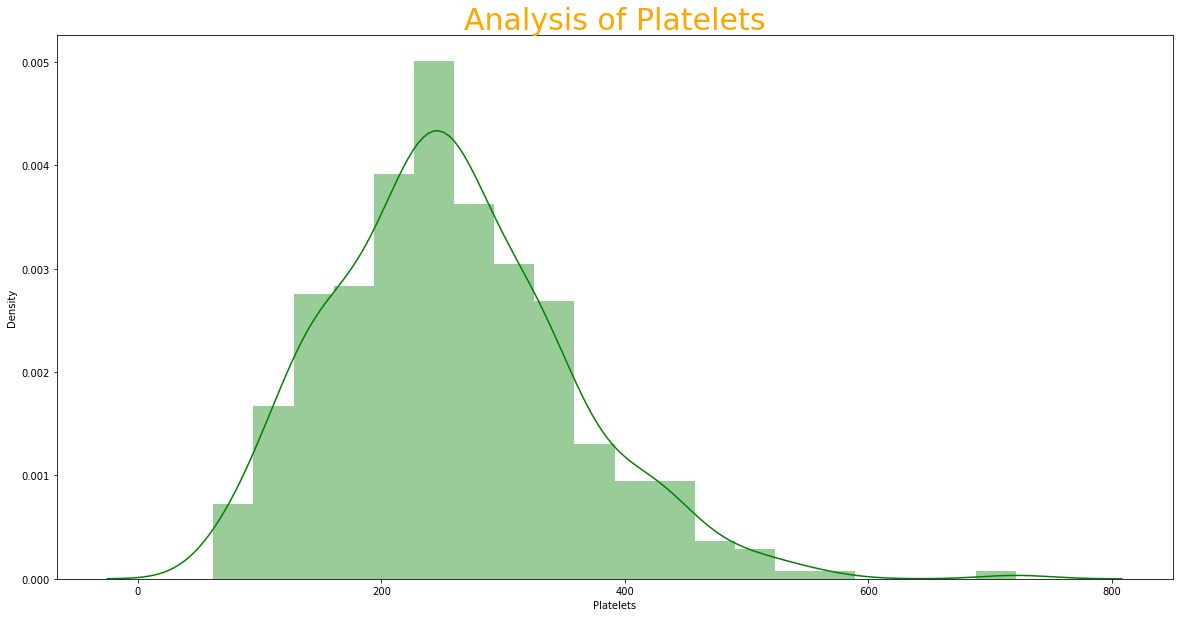

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Platelets,color='green')
print("Skewness is :",df.Platelets.skew())
plt.title(f"Analysis of Platelets" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Platelets - Box Plot')

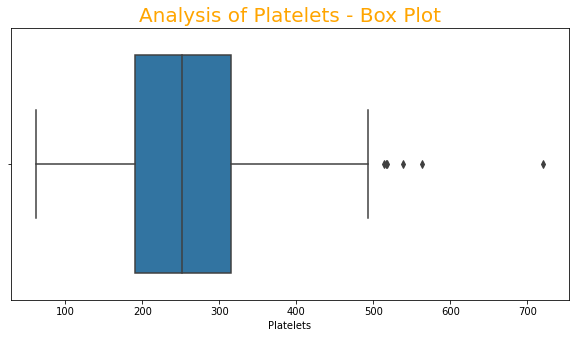

In [ ]:
#boxplot for Platelets
plt.figure(figsize=(10,5))
sns.boxplot(df.Platelets)
plt.title(f"Analysis of Platelets - Box Plot" , fontsize=20,color="orange")

Skewness is : 2.230162218091092


Text(0.5, 1.0, 'Analysis of Prothrombin')

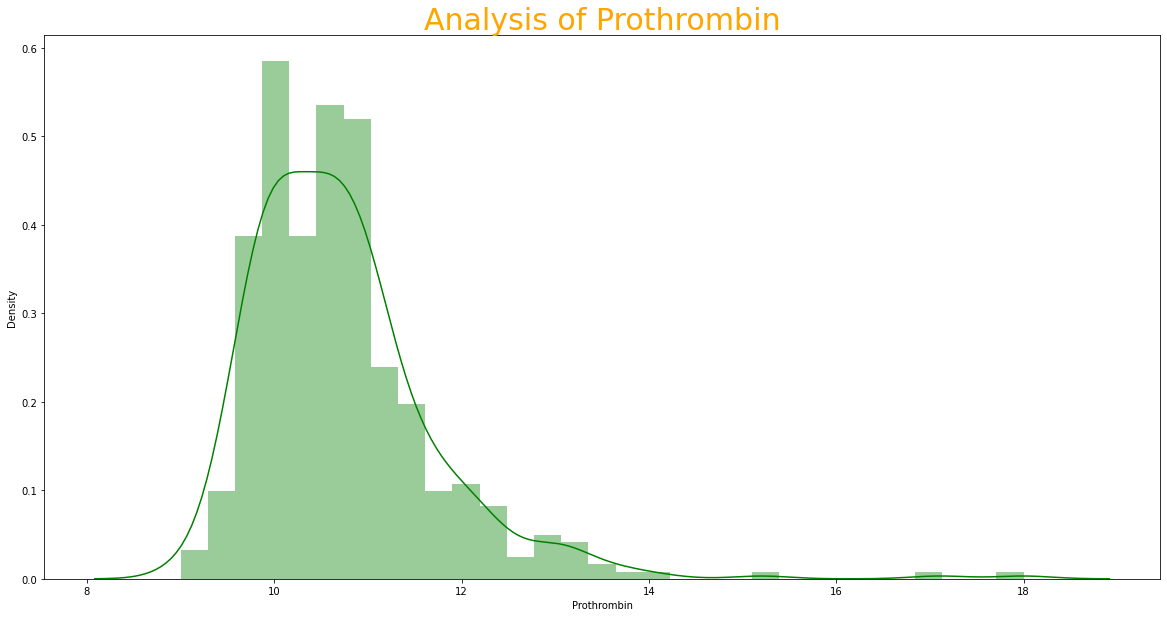

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Prothrombin,color='green')
print("Skewness is :",df.Prothrombin.skew())
plt.title(f"Analysis of Prothrombin" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Prothrombin - Box Plot')

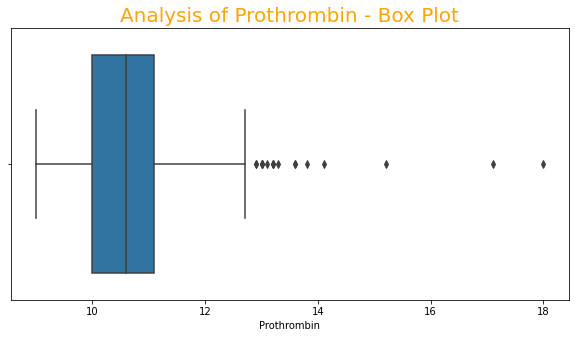

In [ ]:
#boxplot for Prothrombin
plt.figure(figsize=(10,5))
sns.boxplot(df.Prothrombin)
plt.title(f"Analysis of Prothrombin - Box Plot" , fontsize=20,color="orange")

Skewness is : 0.6568249820062653


Text(0.5, 1.0, 'Analysis of Stage')

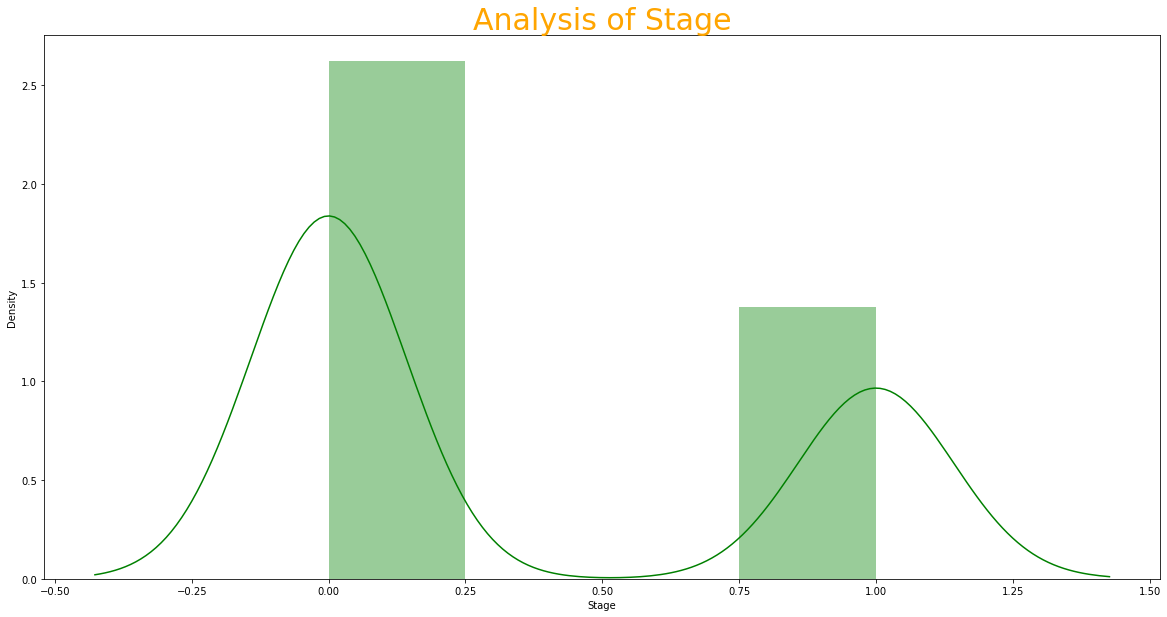

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df.Stage,color='green')
print("Skewness is :",df.Stage.skew())
plt.title(f"Analysis of Stage" , fontsize=30,color="orange")

Text(0.5, 1.0, 'Analysis of Stage - Box Plot')

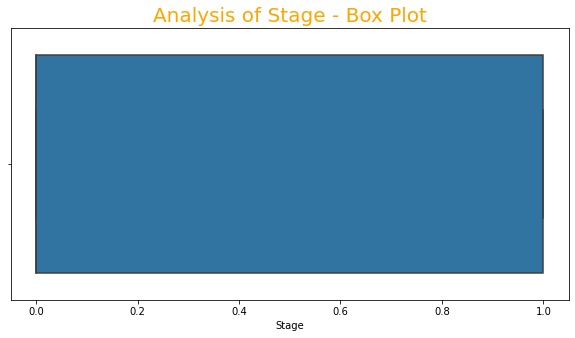

In [ ]:
#boxplot for Stage
plt.figure(figsize=(10,5))
sns.boxplot(df.Stage)
plt.title(f"Analysis of Stage - Box Plot" , fontsize=20,color="orange")

In [ ]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.282580,-0.357086,0.037136,0.083855,-0.182124,0.299714,-0.289600,-0.120732,-0.062154,-0.069327,-0.128924,-0.171115,-0.350981,-0.060318,-0.110382,-0.076032,-0.191959,-0.046311
N_Days,-0.354305,1.000000,0.289630,0.054742,-0.125934,0.007386,-0.247090,-0.287832,-0.180715,-0.038447,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.146144,-0.110685,-0.326899
Status,0.282580,0.289630,1.000000,-0.007620,-0.290571,0.089477,-0.268268,-0.166143,-0.177082,-0.040424,-0.340497,-0.090045,0.210913,-0.236559,-0.193493,-0.193854,-0.127201,0.151839,-0.333499,-0.234699
Drug,-0.357086,0.054742,-0.007620,1.000000,-0.158028,0.019563,0.024685,-0.113408,0.142884,0.074857,0.074236,0.076928,0.047487,0.063790,0.058669,0.068560,0.067222,0.064259,0.051674,0.009887
Age,0.037136,-0.125934,-0.290571,-0.158028,1.000000,-0.163341,0.183588,0.111522,-0.078040,-0.042357,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.146383,0.113916,0.210092
Sex,0.083855,0.007386,0.089477,0.019563,-0.163341,1.000000,-0.015873,-0.016205,0.103809,-0.010600,0.027652,-0.002405,-0.030351,-0.222314,-0.038026,-0.000706,-0.056923,0.089458,-0.070666,-0.030218
Ascites,-0.182124,-0.247090,-0.268268,0.024685,0.183588,-0.015873,1.000000,0.079680,0.195960,0.302299,0.334283,-0.038174,-0.315648,0.235302,0.034538,0.101112,0.197834,-0.167323,0.268142,0.275527
Hepatomegaly,0.299714,-0.287832,-0.166143,-0.113408,0.111522,-0.016205,0.079680,1.000000,0.117692,-0.060740,0.234372,0.064480,-0.269351,0.144227,0.023482,0.091103,0.083989,-0.182456,0.147127,0.328234
Spiders,-0.289600,-0.180715,-0.177082,0.142884,-0.078040,0.103809,0.195960,0.117692,1.000000,0.092741,0.247932,0.093853,-0.162071,0.288117,0.086869,0.145465,0.122999,-0.102217,0.196611,0.232651
Edema,-0.120732,-0.038447,-0.040424,0.074857,-0.042357,-0.010600,0.302299,-0.060740,0.092741,1.000000,0.076519,-0.000447,-0.097001,0.120193,0.012162,0.076865,-0.060745,-0.014237,0.059155,0.003485


Text(0.5, 1.0, 'Pairplot')

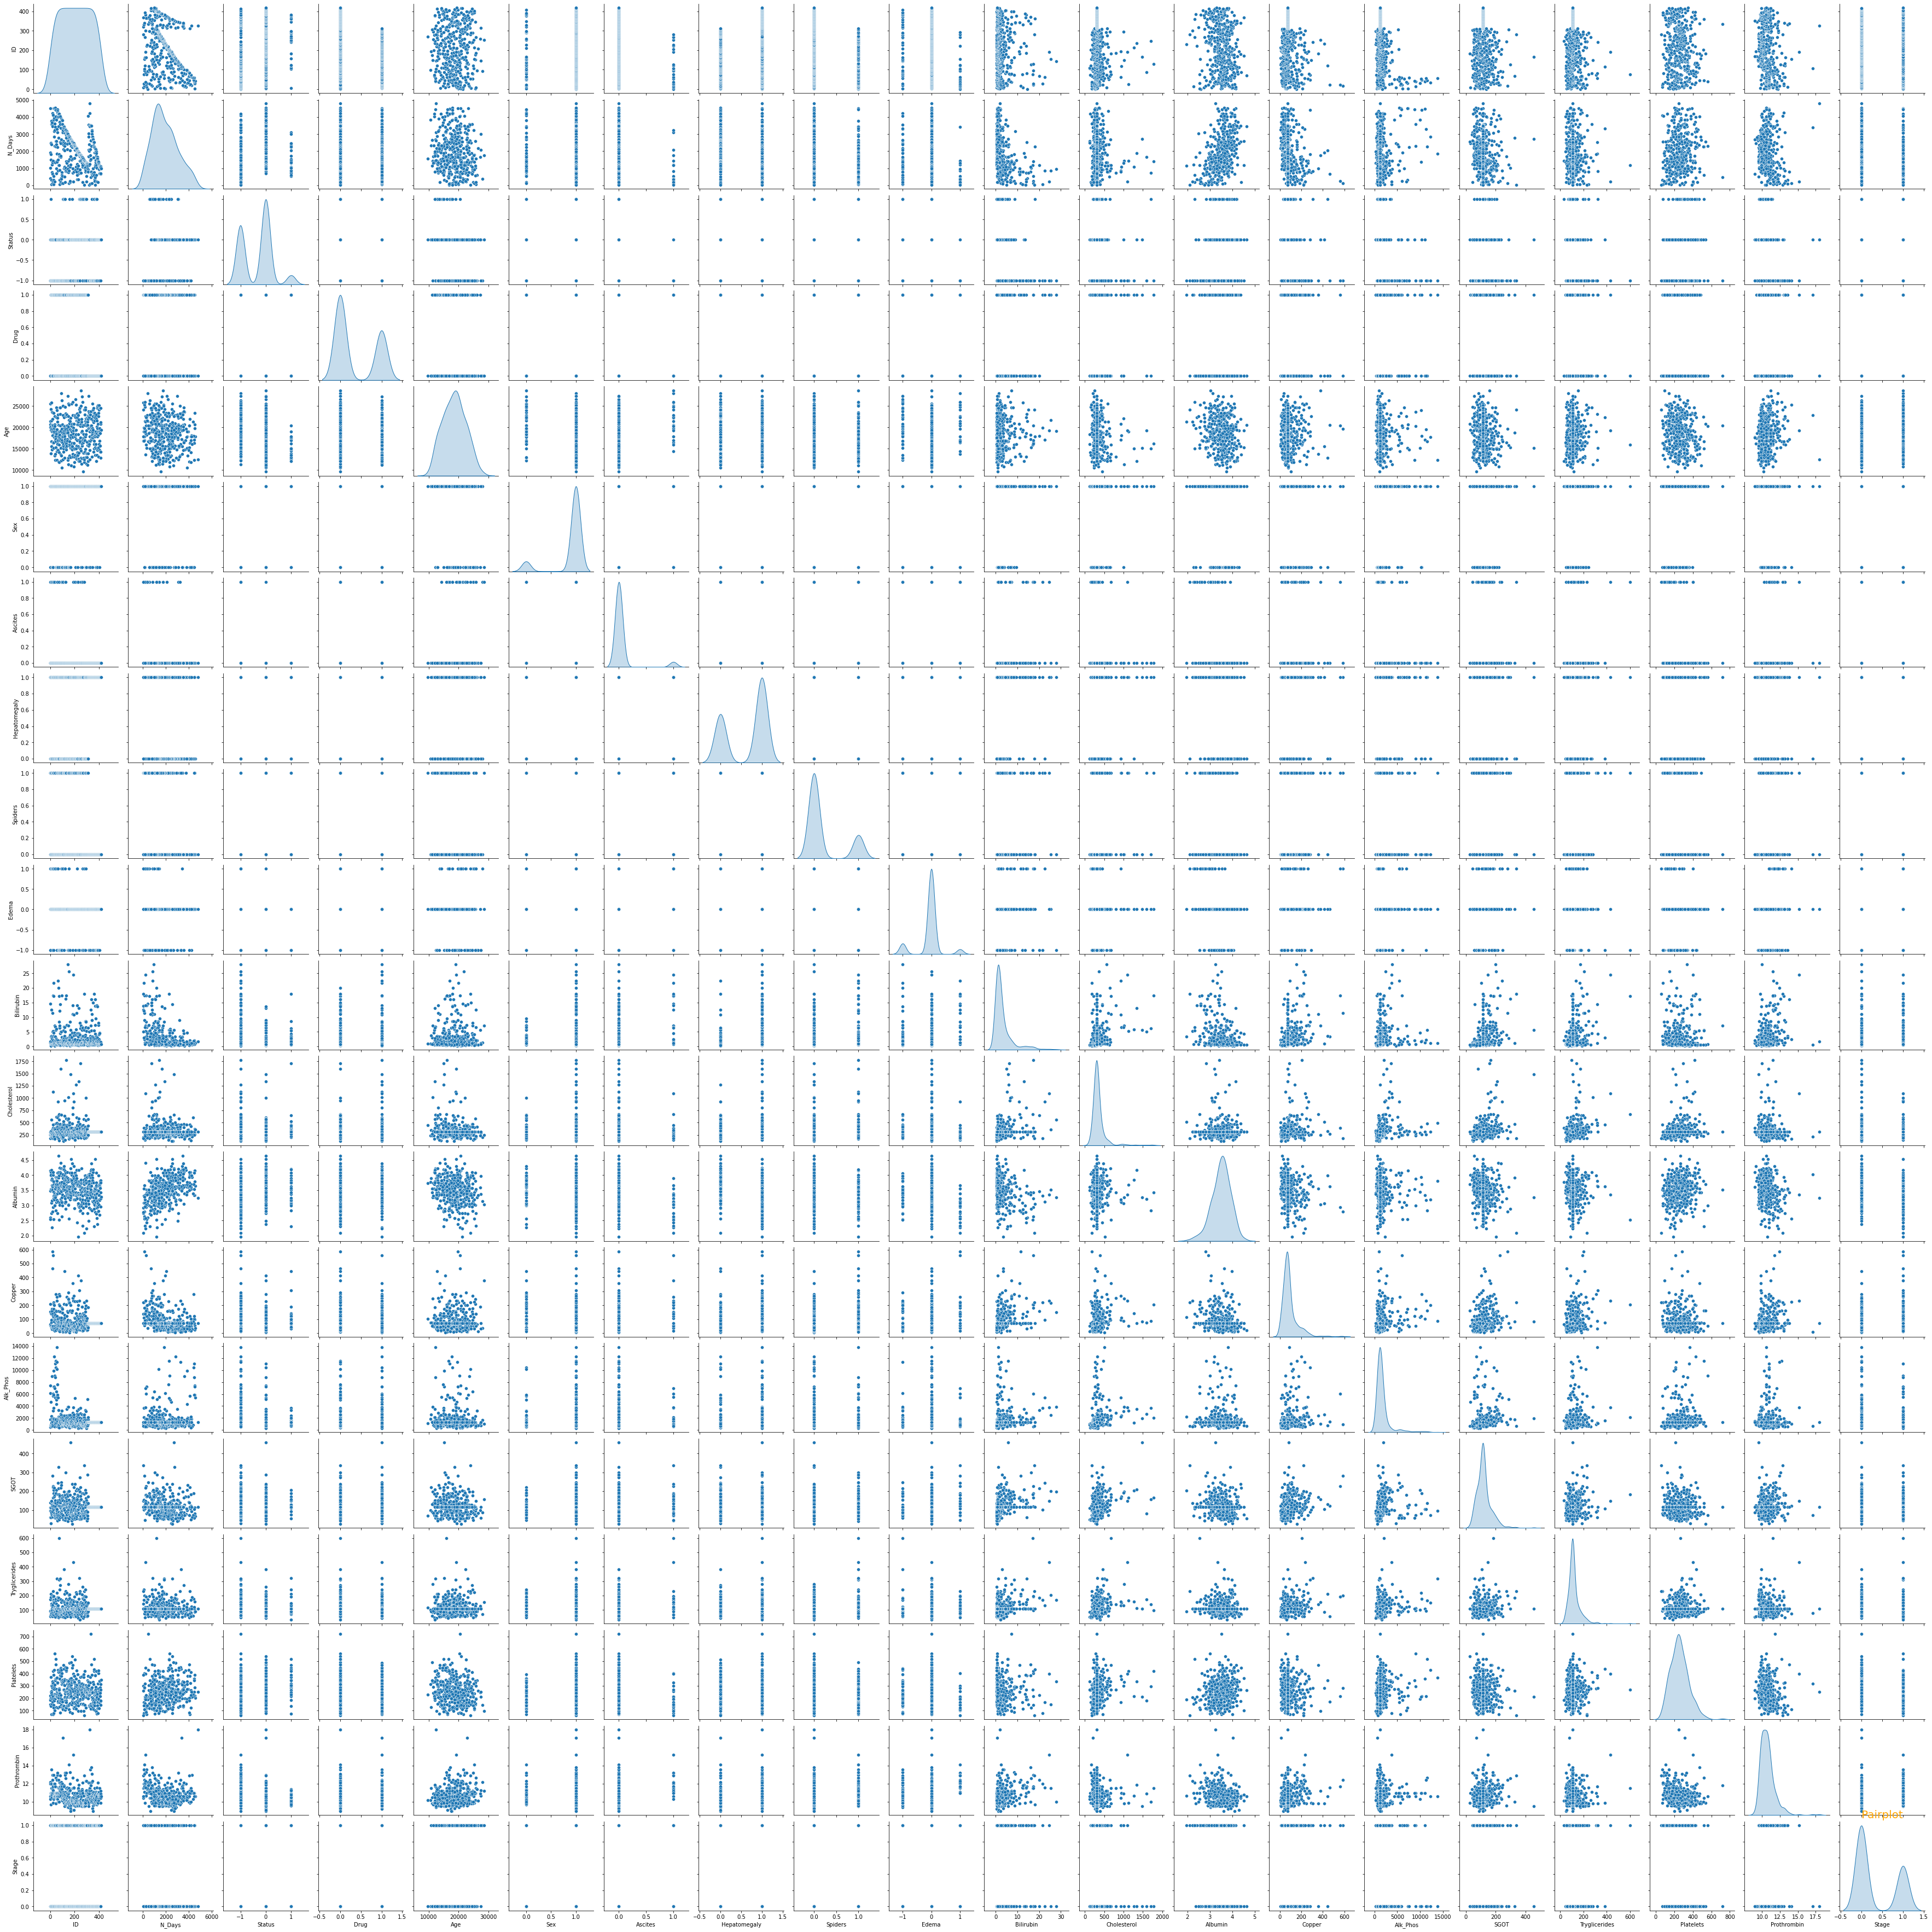

In [ ]:
# plot all the variables and confirm our above deduction with more confidence
sns.pairplot(df, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,color="orange")